# Введение в ТВиМС
## Практикум 1. Описание выборок


### Часть 1. Описание выборки, сохранённой внутри массива

Для работы в этой части практикума нам понадобится библиотека `numpy` (от *Numeric Python*, библиотека для эффективной работы с числовыми массивами) и модуль `pyplot` из библиотеки `matplotlib` (от *mathematical plots library*, библиотека для построения графиков).

Импортируем их с сокращёнными названиями:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Создадим массив NumPy со средними ценами на бензин марки А-92 в регионах Сибирского федерального округа по состоянию на январь 2023 года (Республика Алтай, Республика Тыва, Республика Хакасия, Алтайский край, Красноярский край, Иркутская область, Кемеровская область, Новосибирская область, Омская область, Томская область):

In [2]:
sample = np.array([46.76, 45.98, 45.82, 44.72, 46.13, 
                 47.99, 44.60, 45.81, 44.91, 44.95])

Почему мы сохранили значения в массив, а не в обычный список? С массивами удобнее работать, на них определены векторизованные операции, то есть операции, которые можно применить к каждому элементу безо всяких циклов и их аналогов. Например, мы можем округлить сразу все значения до целых:

In [3]:
# метод .round() только для массивов

sample.round()

array([47., 46., 46., 45., 46., 48., 45., 46., 45., 45.])

Или домножить всё на 100:

In [4]:
# без циклов каждое значение умножается на 100
# на списках так не получится

sample * 100

array([4676., 4598., 4582., 4472., 4613., 4799., 4460., 4581., 4491.,
       4495.])

Или вычислить среднее и стандартное отклонение, а затем выполнить стандартизацию:

In [5]:
# метод .mean() считает среднее массива
# метод .std() считает ст отклонение
# опять же без циклов можем вычесть из каждого значения 
# sample среднее average и поделить на std

average = sample.mean()
std = sample.std()

(sample - average) / std

array([ 0.99451231,  0.21332439,  0.05308072, -1.04859455,  0.36355284,
        2.22638557, -1.16877731,  0.04306549, -0.85830519, -0.81824427])

**Интерпретация.** Как мы помним, 95% значений стандартной нормальной случайной величины лежат в интервале от $-2$ до 2 (от -1.96 до 1.96, если более точно). Ожидается, что после стандартизации данных значения тоже будут принадлежать этому диапазону. Здесь, в целом, это выполняется, однако есть подозрительное значение 2.226. Скорее всего, оно окажется выбросом!

В библиотеке NumPy есть ряд методов и функций, которые позволяют описывать выборки. 

In [6]:
# минимум и максимум

print("Минимум:", sample.min())
print("Максимум:", sample.max())

Минимум: 44.6
Максимум: 47.99


In [7]:
# среднее арифметическое

print("Среднее:", sample.mean())

Среднее: 45.76699999999999


Для выборочной дисперсии есть разные формулы подсчёта, смещённая оценка (с $n$ в знаменателе, менее хорошая) и несмещённая оценка (с $n-1$ в знаменателе, более хорошая), поэтому Python умеет считать сразу обе. По умолчанию он считает смещённую оценку:

In [8]:
# выборочная дисперсия (смещенная оценка)

print("Дисперсия (деление на n):", sample.var())

Дисперсия (деление на n): 0.9969610000000004


Для несмещённой оценки, которая используется чаще, нужно добавить аргумент `ddof = 1`, отвечающий за число, которое необходимо вычесть из объёма выборки $n$ при усреднении суммы квадратов отклонения от среднего:

In [9]:
# выборочная дисперсия (несмещенная оценка)
# ddof – от degrees of freedom, степени свободы
# здесь число степеней свободы n - 1,
# сколько наблюдений достаточно знать, чтобы,
# зная среднее, восстановить всю выборку

print("Дисперсия (деление на n-1):", sample.var(ddof = 1))

Дисперсия (деление на n-1): 1.107734444444445


Со стандартным отклонением та же история:

In [ ]:
# выборочное стандартное отклонение

print("Стандартное отклонение:", sample.std(ddof = 1))

Медиану и квартили выборки Python считать тоже умеет, только в библиотеке NumPy эти статистики считаются не с помощью методов (указываются после названия массива через точку), а с помощью функций (вызываются из самой библиотеки `numpy`, которую мы сократили до `np`, указываеются перед названием массива):

In [10]:
# выборочная медиана и выборочные квартили
# функция np.median()
# функция np.quantile()

print("Медиана:", np.median(sample))
print("Нижний квартиль:", np.quantile(sample, 0.25))
print("Верхний квартиль:", np.quantile(sample, 0.75))

Медиана: 45.815
Нижний квартиль: 44.92
Верхний квартиль: 46.0925


**Интерпретация.** Выборка, конечно, очень маленькая, но это все регионы Сибирского ФО, больше там не найдём, поэтому можем заключить, что: 

* в 50% случаев цены на бензин в Сибирском ФО не превышают 45.82 рублей;
* в 25% цены на бензин в Сибирском ФО не превышают 44.92 рублей;
* в 75% цены на бензин в Сибирском ФО не превышают 46.09 рублей.

В библиотеке `numpy` нет удобной функции для нахождения рангов, поэтому здесь придётся задействовать ещё один модуль – модуль `stats` из библиотеки `scipy` (от *Scientific Python*, библиотека для научных вычислений). Импортируем оттуда только одну функцию для вычисления рангов `rankdata()`:

In [11]:
from scipy.stats import rankdata

In [12]:
rankdata(sample)

array([ 9.,  7.,  6.,  2.,  8., 10.,  1.,  5.,  3.,  4.])

Функция `rankdata()` считает ранги так же, как и мы на занятиях, с усреднением в случае одинаковых значений. В нашем случае цены на бензин указаны с точностью до копеек, одинаковых значений нет, поэтому все значения рангов целые (так как теоретически они могут быть дробными, функция возвращает массив как будто из дробных чисел, точки есть, но дробная часть отсутствует).

Можем проверить на примере другой выборки с повторяющимися значениями, что средние ранги, когда нужно, считаются:

In [13]:
rankdata([2, 2, 7, 0, 1, 1, 1])

array([5.5, 5.5, 7. , 1. , 3. , 3. , 3. ])

Вернёмся к ценам на бензин и построим гистограмму для имеющейся выборки:

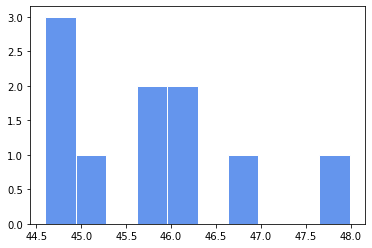

In [14]:
# функция hist() из модуля pyplot, при импорте сократили его до plt
# color – цвет заливки, edgecolor – цвет границ столбцов

plt.hist(sample, color = "cornflowerblue", edgecolor = "white");

**Интерпретация.** Гистограмма показывает, сколько значений выборки попадает в тот или иной интервал, то есть, какие значения встречаются чаще, а какие – реже. Видно, что чаще всего средняя цена бензина в регионах Сибирского ФО принимает значения примерно от 44.5 до 45, а вот значения выше 46.5 уже редки. Плюс, между столбиком слева от значения 47 и столбиком справа от 47.5 наблюдается относительно большой «зазор», это может служить сигналом того, что в выборке, скорее всего, есть выброс или значение, очень близкое к правой границе типичных значений.

Скорректируем число столбцов, чтобы на гистограмме не было «дырок», в данном случае они появляются естественным образом, потому что наблюдений в выборке мало:

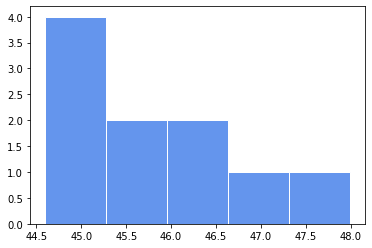

In [15]:
# bins = 5, пять столбцов

plt.hist(sample, color = "cornflowerblue", edgecolor = "white", bins = 5);

Так уже лучше. Если захотим зафиксировать не число столбцов, а шаг гистограммы (ширину столбца, величину интервала группировки), придётся в `bins` вписать последовательность из чисел, которые будут определять границами столбцов. Так, для шага, равного 1.5, мы можем создать соответствующую последовательность значений от 44 до 49:

In [25]:
# np.arange(): как range(), 
# только с дробными числами тоже работает

np.arange(44, 49, 1.5)

array([44. , 45.5, 47. , 48.5])

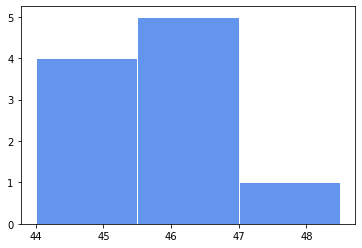

In [26]:
plt.hist(sample, color = "cornflowerblue", edgecolor = "white", 
         bins = np.arange(44, 49, 1.5));

Вернём гистограмму с пятью столбцами и скорректируем подписи к осям:

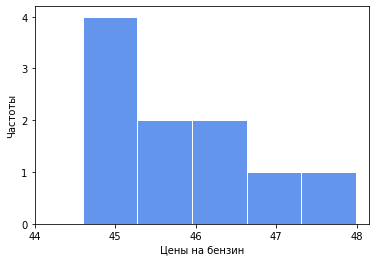

In [27]:
plt.hist(sample, color = "cornflowerblue", edgecolor = "white", bins = 5);

# xlabel: подпись по оси X
# ylabel: подпись по оси Y
# xticks: засечки по оси X
# yticks: засечки по оси Y


plt.xlabel("Цены на бензин");
plt.ylabel("Частоты");
plt.xticks(ticks = range(44, 49));
plt.yticks(ticks = range(0, 5));

Давайте выясним, есть ли в выборке нетипичные значения! Для этого нет готового метода (по крайней мере, в библиотеке `numpy`), поэтому сначала вычислим границы типичных значений самостоятельно:

In [28]:
# q1 - нижний квартиль, q3 - верхний квартиль
# delta - межквартильный размах

q1 = np.quantile(sample, 0.25)
q3 = np.quantile(sample, 0.75)

delta = q3 - q1

lower = q1 - 1.5 * delta
upper = q3 + 1.5 * delta

print(lower, upper)

43.16125 47.85125


Границы нашли. Проверим, есть ли в выборке значения, которые являются нетипичными. Сначала посмотрим на нетипичные снизу:

In [29]:
sample < lower

array([False, False, False, False, False, False, False, False, False,
       False])

Так как операции на массивах применяются сразу к каждому элементу массива (для списков пришлось бы писать цикл и проверять условие для каждого элемента), код выше проверил выполнение условия для каждого значения выборки. Мы получили набор из `False`, значит, нетипично маленьких значений нет. Проверим наличие нетипично больших:

In [30]:
sample > upper

array([False, False, False, False, False,  True, False, False, False,
       False])

А вот такое значение есть – одно `True` всё-таки вышло. Объединим оба условия через оператор ИЛИ:

In [31]:
# нетипичные снизу ИЛИ нетипичные сверху
# numpy работает только с символьными операторами, не словесными
# | вместо or, & вместо and

(sample < lower) | (sample > upper)

array([False, False, False, False, False,  True, False, False, False,
       False])

Теперь подставим это условие из двух частей в квадратные скобки – чтобы отфильтровать значения:

In [32]:
sample[(sample < lower) | (sample > upper)]

array([47.99])

Логика работы кода такая: условие в квадратных скобках возвращает набор из `True` и `False`, из `sample` выбираются те элементы, для которых было получено значение `True`.

**Интерпретация.** В выборке есть одно нетипично большое значение, цена 47.99. Если вернёмся к началу файла, можем увидеть, что это Иркутская область.

Проверим наши результаты – построим ящик с усами:

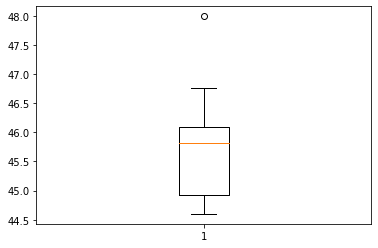

In [33]:
# функция boxplot из plt

plt.boxplot(sample);

Все на месте: квартили 44.92 и 46.09, медиана 45.82, одно нетипичное значение около 48.

### Часть 2. Описание выборки, сохранённой в виде столбца таблицы

В этой части практикума нам понадобится библиотека `pandas`, которая позволяет удобно работать с таблицами и обрабатывать данные, загруженные из файлов Excel или CSV. Импортируем её с сокращённым названием `pd`:

In [34]:
import pandas as pd

Загружать данные из файла пока не будем, лучше приведём нашу выборку `sample` в более приятный вид, чтобы были видны и названия регионов тоже.

Создадим массив с названиями регионов:

In [35]:
regions = np.array(["Республика Алтай", "Республика Тыва",
           "Республика Хакасия", "Алтайский край",
           "Красноярский край", "Иркутская область",
           "Кемеровская область", "Новосибирская область",
           "Омская область", "Томская область"])

Вспомним, какая у нас была выборка:

In [36]:
sample

array([46.76, 45.98, 45.82, 44.72, 46.13, 47.99, 44.6 , 45.81, 44.91,
       44.95])

Создадим датафрейм – таблицу `df`, структура которой будет такой:

* один столбец с названием `ai92`, в него помещаем значения из `sample`;
* названия строк (`index`) совпадают с названиями регионов из `regions`.

In [37]:
# датафреймы похожи на питоновские словари,
# где ключами являются названия столбцов,
# а значениями – перечни значений в каждом столбце,
# поэтому здесь запись через словарь {:}

df = pd.DataFrame({"ai92" : sample}, index = regions)
df

,ai92
Республика Алтай,46.76
Республика Тыва,45.98
Республика Хакасия,45.82
Алтайский край,44.72
Красноярский край,46.13
Иркутская область,47.99
Кемеровская область,44.60
Новосибирская область,45.81
Омская область,44.91
Томская область,44.95


Отлично! Мы получили маленькую таблицу из одного столбца с названием `ai92`. При желании можем выгрузить её в файл Excel:

In [38]:
# файл будет в той же папке, что и текущий ipynb-файл

df.to_excel("Бензин_Сибирский_ФО.xlsx")

Кто любит LaTeX – в виде кода LaTeX тоже можем её выгрузить:

In [40]:
# \toprule и другие \...rule 
# можно заменить на \hline, например

print(df.to_latex())

\begin{tabular}{lr}
\toprule
{} &   ai92 \\
\midrule
Республика Алтай     &  46.76 \\
Республика Тыва       &  45.98 \\
Республика Хакасия    &  45.82 \\
Алтайский край     &  44.72 \\
Красноярский край   &  46.13 \\
Иркутская область     &  47.99 \\
Кемеровская область   &  44.60 \\
Новосибирская область &  45.81 \\
Омская область        &  44.91 \\
Томская область       &  44.95 \\
\bottomrule
\end{tabular}



Выведем для столбца `ai92` основной набор описательных статистик, для этого есть готовый метод `.describe()`:

In [41]:
# выбор столбца по названию – как из словаря по ключу
# в квадратных скобках в кавычках пишем название

df["ai92"].describe()

count    10.00000
mean     45.76700
std       1.05249
min      44.60000
25%      44.92000
50%      45.81500
75%      46.09250
max      47.99000
Name: ai92, dtype: float64

Пояснения:
    
* `count`: число заполненных ячеек в столбце;
* `mean`: среднее арифметическое;
* `std`: стандартное отклонение (уже хорошее, с $n-1$ в знаменателе);
* `min`: минимум;
* `25%`: нижний квартиль;
* `50%`: медиана;
* `75%`: верхний квартиль;
* `max`: максимум.

А теперь некоторые отдельные статистики – методы с говорящими названиями, всё как в раньше:

In [43]:
print("Min:", df["ai92"].min())
print("Man:", df["ai92"].max())
print("Median:", df["ai92"].median())
print("Q1:", df["ai92"].quantile(0.25))
print("Q3:", df["ai92"].quantile(0.75))

Min: 44.6
Man: 47.99
Median: 45.815
Q1: 44.92
Q3: 46.0925


Построим гистограмму и ящик с усами:

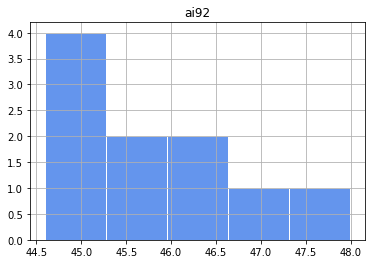

In [44]:
# ко всей таблице применяем метод .hist()
# на первом месте в кавычках пишем название столбца,
# остальное – как раньше

df.hist("ai92", color = "cornflowerblue", edgecolor = "white", bins = 5);

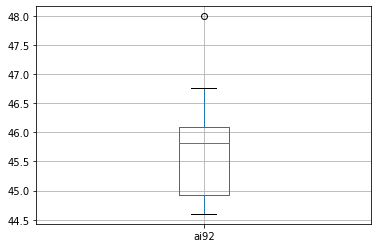

In [45]:
# ко всей таблице применяем метод .boxplot()
# на первом месте в кавычках пишем название столбца

df.boxplot("ai92");

**Дополнения про цвета.** У ящиков с усами цвета изменяются нетривиальным образом, у гистограммы проще. Вместо василькового цвета в примере можем поставить любой цвет:

* из [перечня](https://matplotlib.org/stable/gallery/color/named_colors.html) цветов, воспринимаемых Python;
* используя шестнадцатеричный код, принятый в веб-дизайне (с `#`, [пример](https://g.co/kgs/D8xxGNe) палитры для выбора любого цвета).

Сайт с [забавными](https://colorscheme.ru/color-names.html) названиями цветов (*макароны и сыр*, *мандариновое танго*, *цвет влюбленной жабы* и *лягушка в обмороке* как примеры чего-то безобидного).

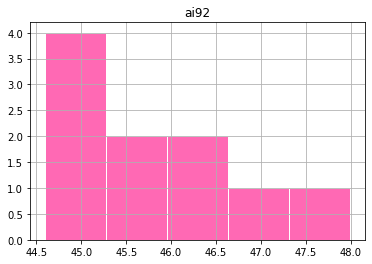

In [46]:
df.hist("ai92", color = "hotpink", edgecolor = "white", bins = 5);

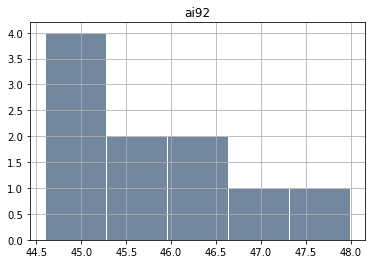

In [47]:
df.hist("ai92", color = "#73879e", edgecolor = "white", bins = 5);